<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
Training Data Info:
 None


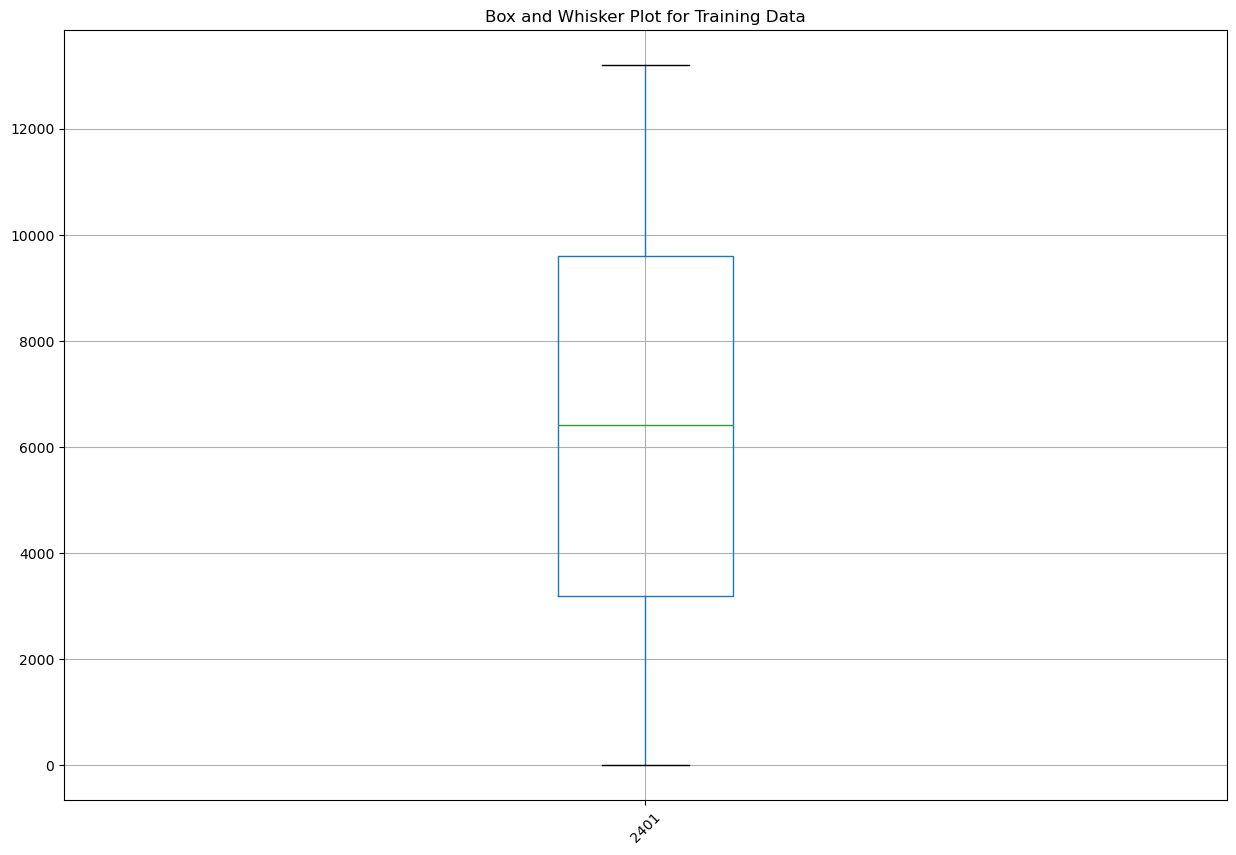

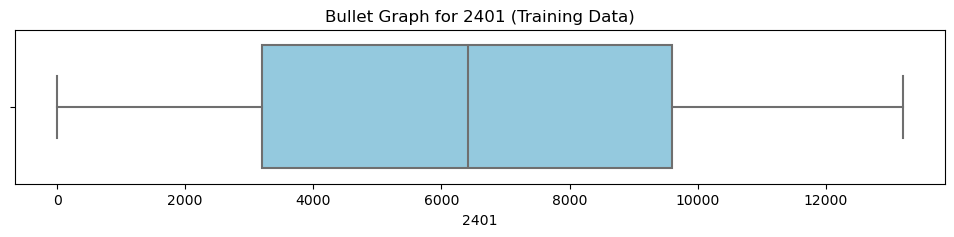

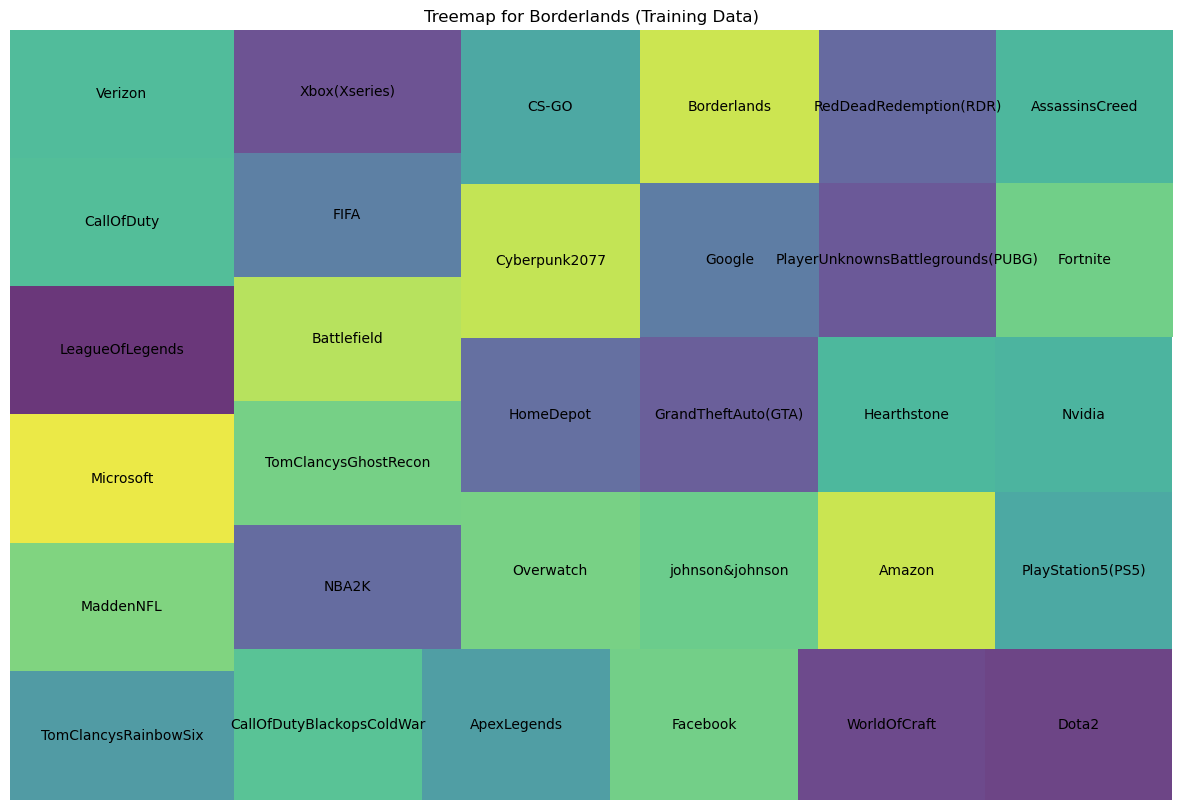

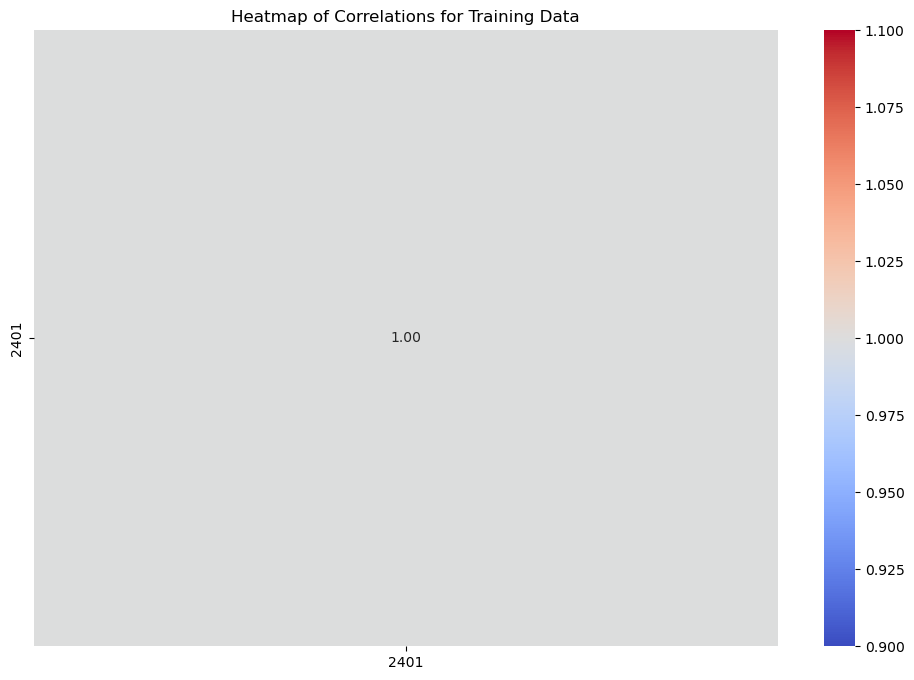

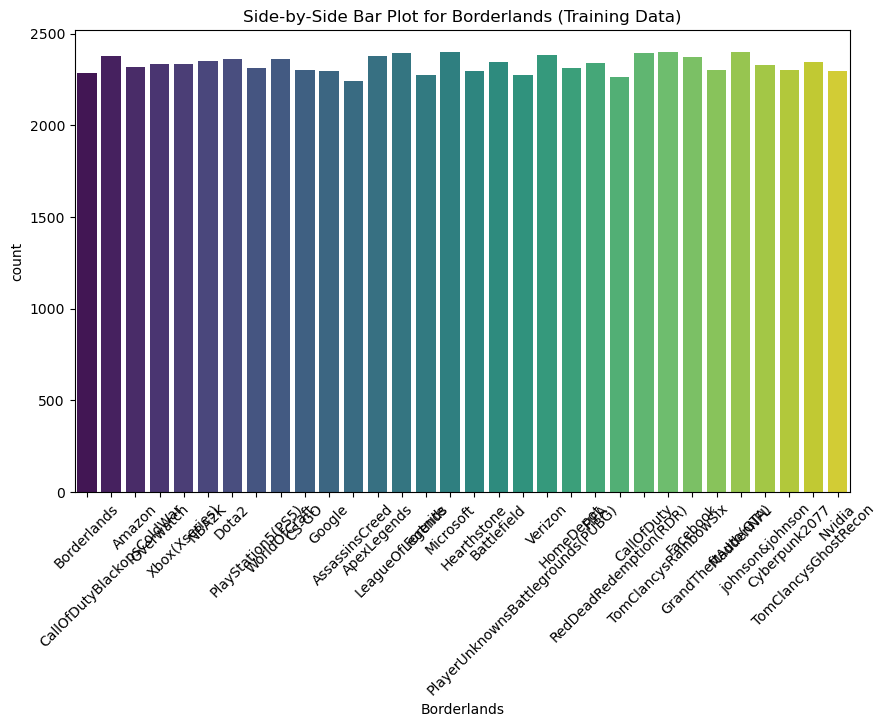

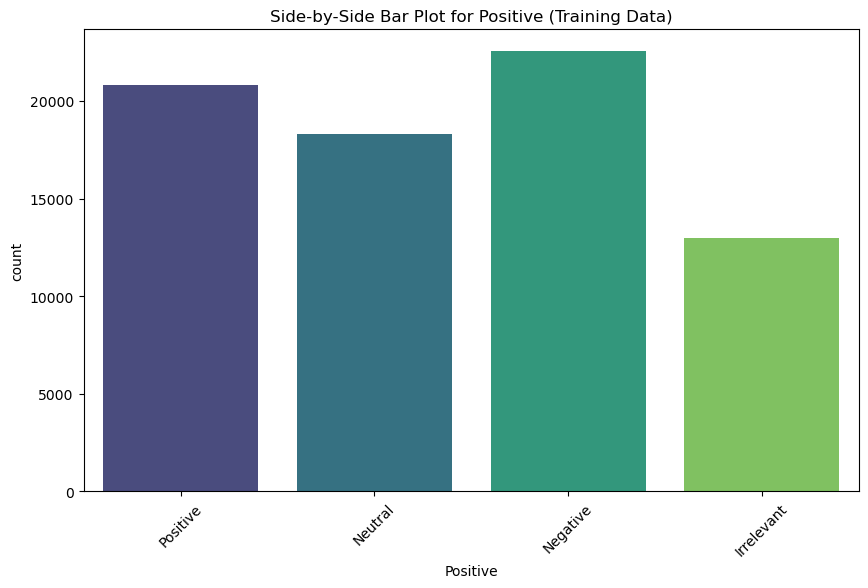

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import os

# Load the training dataset
twitter_training_path = 'twitter_training[1].csv'
twitter_training = pd.read_csv(twitter_training_path)

# Display basic information
print("Training Data Info:\n", twitter_training.info())

# -------------------------
# Data Visualization for Training Data
# -------------------------

# 1. Box and whisker plot for the numeric columns in the training dataset
plt.figure(figsize=(15, 10))  # Enlarge the figure size
twitter_training.select_dtypes(include=np.number).boxplot()
plt.title("Box and Whisker Plot for Training Data")
plt.xticks(rotation=45)
plt.show()

# 2. Bullet graph (a variation using barplots)
numeric_columns = twitter_training.select_dtypes(include=np.number).columns

for col in numeric_columns:
    plt.figure(figsize=(12, 2))  # Enlarge the figure size for better clarity
    sns.boxplot(x=twitter_training[col], color='skyblue')
    plt.title(f'Bullet Graph for {col} (Training Data)')
    plt.show()

# 3. Treemap (requires categorical data counts)
categorical_counts = twitter_training.select_dtypes(include='object').nunique()

# Plot a simple treemap for one of the categorical columns if it exists
if not categorical_counts.empty:
    try:
        import squarify
        category_col = categorical_counts.index[0]  # Select the first categorical column
        value_counts = twitter_training[category_col].value_counts()
        
        plt.figure(figsize=(15, 10))  # Enlarge the figure size
        squarify.plot(sizes=value_counts.values, label=value_counts.index, alpha=0.8)
        plt.title(f'Treemap for {category_col} (Training Data)')
        plt.axis('off')
        plt.show()
    except ImportError as e:
        print("Squarify module not found. Please install it using: pip install squarify")

# 4. Heatmap for correlations
plt.figure(figsize=(12, 8))  # Enlarge the figure size
correlation_matrix = twitter_training.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Correlations for Training Data")
plt.show()

# 5. Side-by-side bar plots for categorical variables
categorical_columns = twitter_training.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(10, 6))  # Enlarge the figure size
    sns.countplot(x=col, data=twitter_training, palette='viridis')
    plt.title(f'Side-by-Side Bar Plot for {col} (Training Data)')
    plt.xticks(rotation=45)
    plt.show()

# ------------------------------
# Decision Tree Classification
# ------------------------------

# Generate synthetic dataset for decision tree
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, n_classes=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(25, 15))  # Enlarge the figure size
plot_tree(clf, filled=True, feature_names=[f'Feature_{i}' for i in range(X.shape[1])], class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")

# Display the Decision Tree in the notebook
plt.show()

# Ensure directory exists to save the file
output_dir = '/mnt/data/'
try:
    os.makedirs(output_dir, exist_ok=True)
except Exception as e:
    print(f"Error creating directory {output_dir}: {e}")

output_path = os.path.join(output_dir, 'decision_tree_visualization.png')
plt.figure(figsize=(25, 15))  # Enlarge the figure size
plot_tree(clf, filled=True, feature_names=[f'Feature_{i}' for i in range(X.shape[1])], class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.savefig(output_path)
print(f"Decision tree visualization saved at: {output_path}")
plt.show()

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Decision Tree Classifier:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, predictions))


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import os

# -------------------------------
# Step 1: Load Dataset
# -------------------------------

# File path for twitter_training[1].csv
training_path = 'twitter_training[1].csv'

# Load the CSV file
try:
    twitter_training = pd.read_csv(training_path)
    print("File loaded successfully.")
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

# Display basic information about the dataset
print("\nDataset Info:")
print(twitter_training.info())
print("\nPreview of Dataset:")
print(twitter_training.head())

# --------------------------------
# Step 2: Preprocess the Data
# --------------------------------

# Drop columns with excessive missing values (threshold set to 30%)
missing_threshold = 0.3
missing_percentage = twitter_training.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index
twitter_training.drop(columns=columns_to_drop, axis=1, inplace=True)

# Fill missing values for each column
for col in twitter_training.columns:
    if twitter_training[col].dtype == 'object':
        twitter_training[col].fillna(twitter_training[col].mode()[0], inplace=True)  # Fill categorical columns with mode
    else:
        twitter_training[col].fillna(twitter_training[col].median(), inplace=True)  # Fill numeric columns with median

# Check for categorical columns
categorical_columns = twitter_training.select_dtypes(include='object').columns

# Convert categorical columns to numeric using one-hot encoding
twitter_training = pd.get_dummies(twitter_training, drop_first=True)

# Display info of the preprocessed data
print("\nPreprocessed Data Info:")
print(twitter_training.info())

# -------------------------------------
# Step 3: Split Data for Model Training
# -------------------------------------

# Separate features (X) and target (y) 
# **IMPORTANT**: Change 'target' to the correct name of the target column.
# If you are unsure of the column name, check the column names using print(twitter_training.columns)
target_column = 'target'  # Replace with the actual name of your target column

if target_column in twitter_training.columns:
    X = twitter_training.drop(columns=[target_column])
    y = twitter_training[target_column]
    print(f"\nTarget column '{target_column}' found and separated successfully.")
else:
    print(f"Error: Target column '{target_column}' not found in the dataset.")
    print(f"Available columns: {twitter_training.columns}")
    exit()

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets successfully.")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# --------------------------------------
# Step 4: Train and Visualize Decision Tree
# --------------------------------------

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting max_depth for better visualization
clf.fit(X_train, y_train)
print("\nDecision Tree Classifier trained successfully.")

# Visualize the decision tree
plt.figure(figsize=(25, 15))  # Enlarge the figure size
plot_tree(clf, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['No', 'Yes']  # Modify based on the class names in the target column
         )
plt.title("Decision Tree Visualization")

# Ensure directory exists to save the file
output_dir = '/mnt/data/'
try:
    os.makedirs(output_dir, exist_ok=True)
except Exception as e:
    print(f"Error creating directory {output_dir}: {e}")

output_path = os.path.join(output_dir, 'decision_tree_visualization.png')
plt.savefig(output_path)
print(f"\nDecision tree visualization saved at: {output_path}")
plt.show()

# --------------------------------------
# Step 5: Model Evaluation
# --------------------------------------

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy of Decision Tree Classifier:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, predictions))


File loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

Preview of Dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming

NameError: name 'X' is not defined


File loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

Preview of Dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am comin

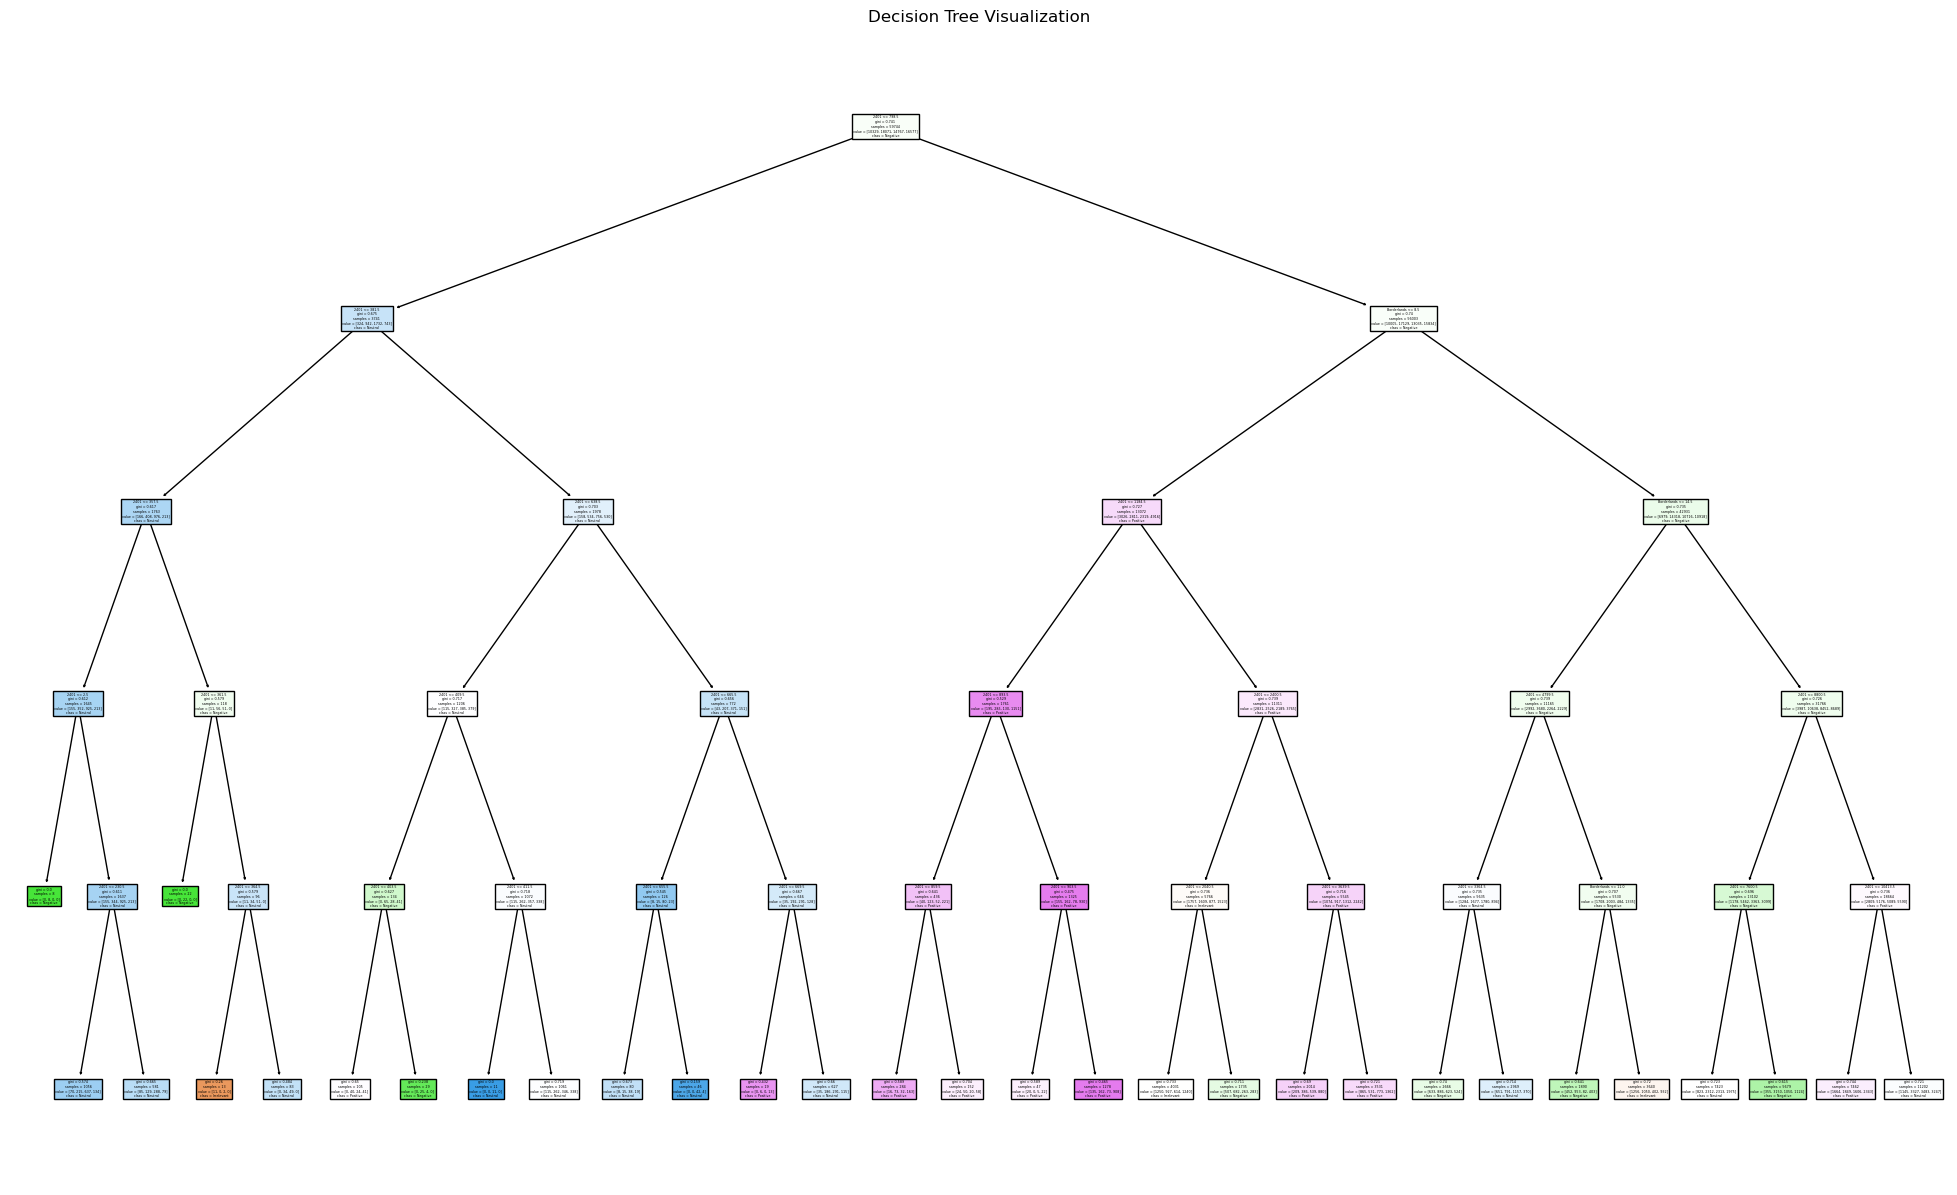


Accuracy of Decision Tree Classifier: 0.37176139787105844

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.25      0.29      2661
           1       0.47      0.32      0.38      4471
           2       0.33      0.59      0.42      3551
           3       0.38      0.32      0.35      4254

    accuracy                           0.37     14937
   macro avg       0.38      0.37      0.36     14937
weighted avg       0.39      0.37      0.36     14937



In [1]:
# --------------------------------------
# Step 1: Import Necessary Libraries
# --------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import os

# --------------------------------------
# Step 2: Load the Dataset
# --------------------------------------
# File path for twitter_training[1].csv
training_path = 'twitter_training[1].csv'  # Update file path if different

# Load the CSV file
try:
    twitter_training = pd.read_csv(training_path)
    print("\nFile loaded successfully.")
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

# Display basic information about the dataset
print("\nDataset Info:")
print(twitter_training.info())
print("\nPreview of Dataset:")
print(twitter_training.head())

# --------------------------------------
# Step 3: Preprocess the Data
# --------------------------------------

# Drop the large text column (since it is difficult to one-hot encode large texts)
text_column = 'im getting on borderlands and i will murder you all ,'
if text_column in twitter_training.columns:
    twitter_training.drop(columns=[text_column], inplace=True)

# Check for missing values and drop columns with excessive missing values (threshold set to 30%)
missing_threshold = 0.3
missing_percentage = twitter_training.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index
twitter_training.drop(columns=columns_to_drop, axis=1, inplace=True)

# Fill missing values for each column
for col in twitter_training.columns:
    if twitter_training[col].dtype == 'object':
        twitter_training[col].fillna(twitter_training[col].mode()[0], inplace=True)  # Fill categorical columns with mode
    else:
        twitter_training[col].fillna(twitter_training[col].median(), inplace=True)  # Fill numeric columns with median

# Check for categorical columns
categorical_columns = twitter_training.select_dtypes(include='object').columns
print(f"\nCategorical columns to encode: {list(categorical_columns)}")

# Use Label Encoding for categorical columns to avoid memory issues from one-hot encoding
encoder = LabelEncoder()
for col in categorical_columns:
    twitter_training[col] = encoder.fit_transform(twitter_training[col])

# Display the info of the preprocessed data
print("\nPreprocessed Data Info:")
print(twitter_training.info())

# --------------------------------------
# Step 4: Separate Features (X) and Target (y)
# --------------------------------------

# Target column — update this if 'Positive' is not the correct target
target_column = 'Positive'  # Replace 'Positive' with the actual target column name if different

# Check if the target column is in the dataset
if target_column in twitter_training.columns:
    X = twitter_training.drop(columns=[target_column])  # Features
    y = twitter_training[target_column]  # Target
    print(f"\nTarget column '{target_column}' found and separated successfully.")
else:
    print(f"Error: Target column '{target_column}' not found in the dataset.")
    print(f"Available columns: {twitter_training.columns}")
    exit()

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets successfully.")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# --------------------------------------
# Step 5: Train and Visualize Decision Tree
# --------------------------------------

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting max_depth for better visualization
clf.fit(X_train, y_train)
print("\nDecision Tree Classifier trained successfully.")

# Visualize the decision tree
plt.figure(figsize=(25, 15))  # Enlarge the figure size
plot_tree(clf, 
          filled=True, 
          feature_names=X.columns, 
          class_names=encoder.classes_  # Update this if classes are different
         )
plt.title("Decision Tree Visualization")

# Save the visualization
output_dir = '/mnt/data/'
try:
    os.makedirs(output_dir, exist_ok=True)
except Exception as e:
    print(f"Error creating directory {output_dir}: {e}")

output_path = os.path.join(output_dir, 'decision_tree_visualization.png')
plt.savefig(output_path)
print(f"\nDecision tree visualization saved at: {output_path}")
plt.show()

# --------------------------------------
# Step 6: Model Evaluation
# --------------------------------------

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy of Decision Tree Classifier:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, predictions))
